# Assignment8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from itertools import combinations
from copy import deepcopy

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [5]:
df = pd.read_csv("car_data.csv")

In [7]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


#### Task 1

In [9]:
#linear Regression 
regr_mp = linear_model.LinearRegression()
mileage = df[['Mileage']]
price = df['Price']
regr_mp.fit(mileage, price)
print('{} * Price + {:.2f}'.format(regr_mp.coef_[0], regr_mp.intercept_))

-0.1725205027912493 * Price + 24764.56


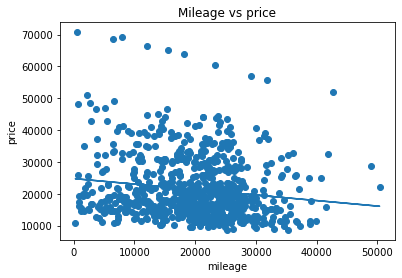

In [11]:
#plotting the values of the original data
plt.scatter(x=mileage, y=price)
plt.plot(mileage, regr_mp.predict(mileage))
plt.title('Mileage vs price')
plt.xlabel('mileage')
plt.ylabel('price')
plt.show()

In [12]:
#combinationm of the factors
print(' Score of linear regression: {:.5f}'
      .format(regr_mp.score(mileage,price)))

 Score of linear regression: 0.02046


##### The score is nowhere close to value 0.8 ,it is not a good fit for our data. It is considered as weaker correlation .

#### Tasks, Part 2


In [13]:
df.head(2)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0


In [19]:
car_features = ['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']

In [20]:
def lin_reg_eq(cols, df_in, focus='Price', print_this=False):
    input_cols = df_in[cols]
    focus_output = df_in[focus]
    regr = linear_model.LinearRegression()
    regr.fit(input_cols, focus_output)
    if print_this:
        print('The equation for columns {} w.r.t. {}:\n'.format(cols, focus))
        for n, x in enumerate(cols):
            print('({} * {}) + '.format(regr.coef_[n], x))
        print('{}'.format(regr.intercept_))
    return regr

In [21]:
regr_features = lin_reg_eq(car_features, df, print_this=True)

The equation for columns ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'] w.r.t. Price:

(-0.16974783233303697 * Mileage) + 
(3792.3789307825155 * Cylinder) + 
(-787.2207316338224 * Liter) + 
(-1542.7458463820678 * Doors) + 
(6288.997149849927 * Cruise) + 
(-1993.7952756984266 * Sound) + 
(3349.361619613554 * Leather) + 
6758.755143598077


In [22]:
print('Score of the above linear regression: {}'
      .format(regr_features.score(df[car_features], df['Price'])))

Score of the above linear regression: 0.446264353672838


In [23]:
def lin_reg_wrt_focus(cols, df_in, focus='Price'):
    '''cols is a list of lists'''
    input_cols = df_in[cols]
    focus_output = df_in[focus]
    regr = linear_model.LinearRegression()
    regr.fit(input_cols, focus_output)
    return regr.score(input_cols, focus_output)

def get_combos(cols):
    return [list(combinations(cols, n + 1)) for n in range(len(cols))]

def all_combo_scores(combos, df_in, focus='Price'):
    combo_scores = {}
    for m in range(len(combos)):
        for n in combos[m]:
            combo_scores[n] = lin_reg_wrt_focus(list(n), df_in, focus)
    return combo_scores

In [24]:
combos = get_combos(car_features)
combo_scores = all_combo_scores(combos, df)
score_list1 = sorted(combo_scores.items(), key=lambda c: c[1], reverse=True)
for score in score_list1:
    print(score[1], score[0])

0.446264353672838 ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather')
0.44569092105870245 ('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather')
0.437805741536638 ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Leather')
0.4369402151237246 ('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Leather')
0.43014148406475605 ('Mileage', 'Cylinder', 'Liter', 'Cruise', 'Sound', 'Leather')
0.43001820483252684 ('Mileage', 'Cylinder', 'Cruise', 'Sound', 'Leather')
0.4265348637809261 ('Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather')
0.4257681327974422 ('Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather')
0.42482840454267856 ('Mileage', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather')
0.42441824017998775 ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound')
0.42409748258510405 ('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound')
0.4225307670398466 ('Mileage', 'Cylinder', 'Liter', 'Cruise', 'Leather')
0.4225074214774762 ('Mileage', 'Cylinder', 'Cruise', 'Leath

##### There is no combination that produces a strong correlation. However, the 'Cylinder' field has a high score on its own: 0.32385903759512258.

#### Task Hard Mode

In [27]:
df_mmb = df.copy()

df_make = pd.get_dummies(df['Make'])
df_mmb[list(df_make.columns)] = df_make
df_mmb.pop('Make')

df_model = pd.get_dummies(df['Model'])
df_mmb[list(df_model.columns)] = df_model
df_mmb.pop('Model')

df_type = pd.get_dummies(df['Type'])
df_mmb[list(df_type.columns)] = df_type
df_mmb.pop('Type')

pd.set_option('display.max_columns', None)
df_mmb.head(2)

,Price,Mileage,Trim,Cylinder,Liter,Doors,Cruise,Sound,Leather,Buick,Cadillac,Chevrolet,Pontiac,SAAB,Saturn,9-2X AWD,9_3,9_3 HO,9_5,9_5 HO,AVEO,Bonneville,CST-V,CTS,Cavalier,Century,Classic,Cobalt,Corvette,Deville,G6,GTO,Grand Am,Grand Prix,Impala,Ion,L Series,Lacrosse,Lesabre,Malibu,Monte Carlo,Park Avenue,STS-V6,STS-V8,Sunfire,Vibe,XLR-V8,Convertible,Coupe,Hatchback,Sedan,Wagon
0,17314.103129,8221,Sedan 4D,6,3.1,4,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,17542.036083,9135,Sedan 4D,6,3.1,4,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [28]:
columns = list(df_make.columns)
columns.extend(df_model.columns)
columns.extend(df_type.columns)
input_cols = []
for item in columns:
    input_cols.append([item])
input_cols[:3]

[['Buick'], ['Cadillac'], ['Chevrolet']]

The two-factor combinations of the original car_features list with each of the new dummy columns to know what is the highest score.

In [29]:
combo_twos = list(combinations(car_features, 2))
combo_twos_list = [[x[0], x[1]] for x in combo_twos]
combo_twos_list[:3]

[['Mileage', 'Cylinder'], ['Mileage', 'Liter'], ['Mileage', 'Doors']]

In [30]:
def all_combos_plus_scores(combos, combo_addition, df_in, focus='Price'):
    scores = {}
    for c_a in combo_addition:
        combos_c = deepcopy(combos)
        for cb in combos_c:
            cb.extend(c_a)
            scores[(cb[0], cb[1], cb[2])] = lin_reg_wrt_focus(cb, df_in, focus)
    return scores

#### Below are the dominant two feature factors for each of the dummy variables; Cylinder and Cruise are the leading factors in the vast majority.

In [34]:
car_data_combos = all_combos_plus_scores(combo_twos_list, input_cols, df_mmb)
car_data_combos_list = sorted(car_data_combos.items(), key=lambda c: c[1], reverse=True)
max_dict = {}
for score_ in car_data_combos_list:
    try:
        max_dict[score_[0][2]]
    except:
        max_dict[score_[0][2]] = score_[1]
        print(score_[1], score_[0])

0.6952326188089184 ('Mileage', 'Cylinder', 'SAAB')
0.5827463723115367 ('Liter', 'Cruise', 'Cadillac')
0.5818864330871814 ('Cylinder', 'Cruise', 'Convertible')
0.5565646069943804 ('Cylinder', 'Doors', 'Coupe')
0.5183767328460664 ('Liter', 'Cruise', 'XLR-V8')
0.4677007997077759 ('Cylinder', 'Cruise', '9_3 HO')
0.46131412749530276 ('Cylinder', 'Doors', 'Chevrolet')
0.44031377831419116 ('Cylinder', 'Cruise', '9_5')
0.42327964442945454 ('Cylinder', 'Cruise', 'Pontiac')
0.4209127935020318 ('Cylinder', 'Cruise', 'Wagon')
0.41425766320268764 ('Cylinder', 'Cruise', '9_3')
0.4094908134557421 ('Cylinder', 'Cruise', '9_5 HO')
0.40853637029735634 ('Cylinder', 'Cruise', 'Sedan')
0.40801434993536767 ('Cylinder', 'Cruise', 'Buick')
0.4066332114627612 ('Cylinder', 'Cruise', 'CST-V')
0.4061981380211488 ('Cylinder', 'Cruise', 'Grand Prix')
0.4039216683852761 ('Cylinder', 'Cruise', 'Malibu')
0.4028424051921041 ('Cylinder', 'Cruise', 'STS-V6')
0.4024100042889771 ('Cylinder', 'Cruise', 'Bonneville')
0.40004

#### Each of the dummy variables on their own scores shown below

In [35]:
car_data_2 = {}
for item in deepcopy(input_cols):
    car_data_2[item[0]] = lin_reg_wrt_focus(item, df_mmb)

score_list2 = sorted(car_data_2.items(), key=lambda c: c[1], reverse=True)
for score in score_list2:
    print(score[1], score[0])

0.43467222055774146 Cadillac
0.25808237266623624 Convertible
0.22329254532193277 XLR-V8
0.16369972777296582 Chevrolet
0.11249608486981633 SAAB
0.09268208373129971 AVEO
0.08811897712425065 Deville
0.08294059063514281 Corvette
0.07236606185907579 CST-V
0.060443061923161845 STS-V8
0.059386315780149745 Cavalier
0.04481729286980152 Saturn
0.044294927303921816 9_3 HO
0.042509414286992286 Hatchback
0.04218076819132699 Ion
0.03711188670126875 Cobalt
0.0331684123827396 STS-V6
0.02992939459223687 9_5
0.028253210000207085 Coupe
0.020191011838045725 Pontiac
0.01551727999156971 9_3
0.01441266225511073 Malibu
0.012235997496740647 9_5 HO
0.011848005294655573 Vibe
0.010715368384112356 CTS
0.00990383596925093 Sunfire
0.008683138908399224 Grand Am
0.007825848896145682 GTO
0.007741907120061953 Classic
0.004735027107433676 Grand Prix
0.003698911729677512 Century
0.0029638255654020895 L Series
0.0020370652981834825 Wagon
0.001866756188844798 Park Avenue
0.00121119693448557 Sedan
0.0008950546441520713 Monte

#### Taking  Cadillac, Convertible, and Chevrolet 

In [36]:
adjusted_car_features = car_features + ['Cadillac', 'Convertible', 'Chevrolet']
lin_reg_wrt_focus(adjusted_car_features, df_mmb)

0.8301641680699674

##### This score is enough to push us over the 0.8 barrier, We have a strong correlation.

In [37]:
adjusted_car_features_2 = ['Cadillac', 'Convertible', 'Chevrolet', 'Mileage', 'Cylinder', 'Cruise', 'Liter']
lin_reg_wrt_focus(adjusted_car_features_2, df_mmb)

0.8230830294947846

##### Using just the main factors from above , we get similarl impressive score.